# Alternus Vera Part 2 Deliverables


Course code : **CMPE-257** 
    
Group name : **Codebusters**
    
Name: **Harini Balakrishnan (010830755)** 

- GitHub URL https://github.com/HariniGB/MachineLearning/tree/master/AlternusVera
    
----
This notebook is about the factor: **Sentiment Analysis**

## Liar Liar  Data set Description 
- It has 3 files test, training and valid.
- Each file has 14 columns
    Column 1: the ID of the statement ([ID].json).
    Column 2: the label.
    Column 3: the statement.
    Column 4: the subject(s).
    Column 5: the speaker.
    Column 6: the speaker's job title.
    Column 7: the state info.
    Column 8: the party affiliation.
    Column 9-13: the total credit history count, including the current statement.
    9: barely true counts.
    10: false counts.
    11: half true counts.
    12: mostly true counts.
    13: pants on fire counts.
    Column 14: the context (venue / location of the speech or statement).

#### Process Steps: 
- Reading the Data
- Data Cleaning and Text Preprocessing
- Visualization
- Data Enrichment using SenticNet 5
- Bag of Words using CountVectorizer
- Modeling and comparison 
- Sentiment Analysis using TF-IDF
- Modeling and comparison
- Sentiment Analysis using Word2Vec (skip-gram) **Drawback with dimensionality - So performing Doc2Vec**
- Sentiment Analysis using Doc2Vec 
- Modeling and comparison
- Result 


#### Feature Selection
** Top 10 Features Selected based on research articles**
- Topic Modeling - LDA
- Sentiment Analysis 
- Social acceptance = # of likes, # of comments (short term utility)
- Bias Score
- Spam Score
- Website credibility/ Domain Ranking
- Author credibility
- Political Affliation
- Occurance Location (Probability of announcing on Radio or Press release being fake is low)
- Sensationalism/Psychology Utility - agreeing with reader's prior beliefs
- Frequency Heuristic - Constant repetition makes them believe (Sensationlism)
- Echo Chamber - Forming groups and spreading opinions
- Visual - Images, Links, Videos

### Reading the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the test, training and valid data from files
# Header = 0 indicates that the first line of the file contains column names,
# As there is no Header, create a column names for each column in the dataset
# delimiter = \t indicates that the fields are seperated by tabs, and 


test_filename = 'input_data/test.tsv'
train_filename = 'input_data/train.tsv'
valid_filename = 'input_data/valid.tsv'

colnames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']

train_news = pd.read_csv(train_filename, sep='\t', names = colnames,error_bad_lines=False)
test_news = pd.read_csv(test_filename, sep='\t', names = colnames,error_bad_lines=False)
valid_news = pd.read_csv(valid_filename, sep='\t', names = colnames,error_bad_lines=False)

In [3]:
# Display check the dimensions and the first 2 rows of the file.

print('train dim:',train_news.shape, 'test dim:', test_news.shape)
train_news.iloc[0:2]

train dim: (10240, 14) test dim: (1267, 14)


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.


In [4]:
# Let's check the first news in the training dataset
train_news.iloc[0]["headline_text"][:len(train_news.iloc[0]["headline_text"])]

'Says the Annies List political group supports third-trimester abortions on demand.'

### Data Cleaning and Text Preprocessing 
- Clean Text 
- Tokenize the text
- Remove Stop Words
- Stemming 

#### Removing Non-Letter Characters & Converting Reviews to Lower Case 

In [5]:
import re

example = train_news["headline_text"][0]
news = re.sub("[^a-zA-Z]", " ", example)
print("Before: ", example)
news = news.lower()
print("After: ", news)

Before:  Says the Annies List political group supports third-trimester abortions on demand.
After:  says the annies list political group supports third trimester abortions on demand 


#### Tokenization 
> Tokenization is the process splitting a sentence or paragraph into the most basic units.

In [6]:
# Import Natural Language Toolkit
import nltk

# Instead of using just split() method, used word_tokenize in nltk library.
print("Before: ", news)
news_words = nltk.word_tokenize(news)
print("After: ", news_words)

Before:  says the annies list political group supports third trimester abortions on demand 
After:  ['says', 'the', 'annies', 'list', 'political', 'group', 'supports', 'third', 'trimester', 'abortions', 'on', 'demand']


#### Removing Stop words 
> "Stop words" is the frequently occurring words that do not carry much meaning such as "a", "and" , "is", "the". In order to use the data as input for machine learning algorithms, we need to get rid of them. Fortunately, there is a function called stopwords which is already built in NLTK library

In [7]:
from nltk.corpus import stopwords

print("List of Stop words: \n" , stopwords.words("english"))
# Exclude the stop words from the original tokens.
words = [w for w in news_words if not w in set(stopwords.words("english"))]
print("\n\nBefore: \n", news_words)
print("\nAfter: \n", words)

List of Stop words: 
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', '

#### Inferences: 
    
> As you can see the words "the" and "on" is removed

-----

#### Stemming

> Stemming algorithms work by cutting off the end of the word, and in some cases also the beginning while looking for the root. This indiscriminate cutting can be successful in some occasions, but not always, that is why we affirm that this an approach that offers some limitations. ex) studying -> study, studied -> studi 

**Alternate approach is *Lemmatization* **

> Lemmatization is the process of converting the words of a sentence to its dictionary form. For example, given the words amusement, amusing, and amused, the lemma for each and all would be amuse. ex) studying -> study, studied -> study. Lemmatization also discerns the meaning of the word by understanding the context of a passage. For example, if a "meet" is used as a noun then it will print out a "meeting"; however, if it is used as a verb then it will print out "meet"

**Three major stemming algorithms:** 
- Porter *(Least aggressive)*
- Snowball
- Lancaster 


The **"aggressive algorithms"** means how much a working set of words are reduced. The *more aggressive* the algorithms, the *faster* it is; however, in some certain circumstances, it will hugely trim down your working set. 

Therefore, in this project I decide to use **snowball** since it is slightly ***faster than Porter and does not trim down too much information as Lancaster does***.

In [8]:
snow = nltk.stem.SnowballStemmer('english')

stems = [snow.stem(w) for w in words ]
print("Before: \n", words )
print("\nAfter: \n",stems )

Before: 
 ['says', 'annies', 'list', 'political', 'group', 'supports', 'third', 'trimester', 'abortions', 'demand']

After: 
 ['say', 'anni', 'list', 'polit', 'group', 'support', 'third', 'trimest', 'abort', 'demand']


#### Inferences: 
    
> As you can see the word "says", it is converted to "say" and "political", "supports" and "abortions" are converted to "polit", "support" and "abort"

###  Putting It All Together 

So far, we have cleaned only the first article to understand the difference in each step. 
Now it's time to apply all the cleaning process to the entire corpus (all rows). 
To make the code reusable, we need to create a function that can be called many times.

In [9]:
def cleaning(raw_news):
    import nltk
    
    # 1. Remove non-letters.
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in words]
    
    # 7. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

In [10]:
import time
# clean training and test data 
# create new column "tokenized"
t1 = time.time()

# Add the processed data to the original data. 
# Perhaps using apply function would be more elegant and concise than using for loop
train_news['clean'] = train_news["headline_text"].apply(cleaning) 

t2 = time.time()
print("\nTime to clean, tokenize and stem train data: \n", len(train_news), "news:", (t2-t1)/60, "min")


t1 = time.time()
test_news['clean'] = test_news["headline_text"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem test data: \n", len(test_news), "news:", (t2-t1)/60, "min")


Time to clean, tokenize and stem train data: 
 10240 news: 0.14496328035990397 min


Time to clean, tokenize and stem test data: 
 1267 news: 0.026295868555704753 min


### Visualization 

#### WordCloud 

> As a tool for visualization by using the frequency of words appeared in text, we use WordCloud. Note that it can give more information and insight of texts by analyzing correlations and similarities between words rather than analyzing texts only by the frequency of words appeared; however, it can give you some general shape of what this text is about quickly and intuitively.

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

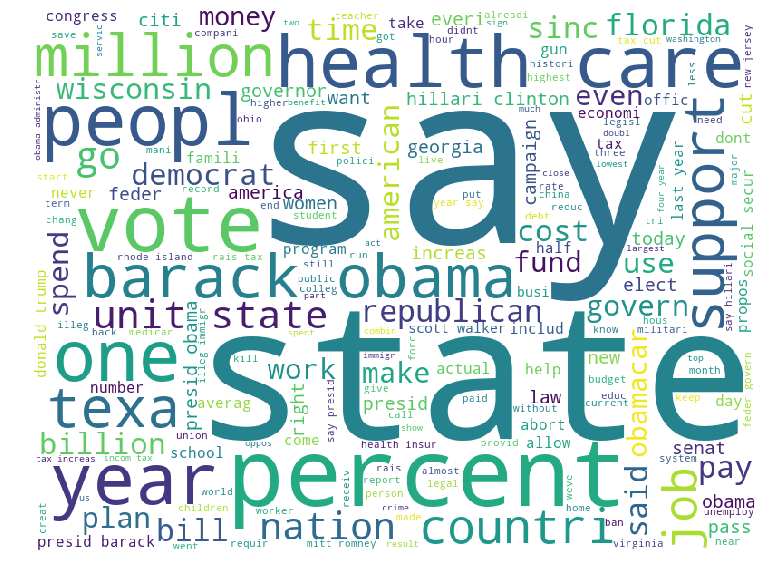

In [12]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(train_news['clean']))

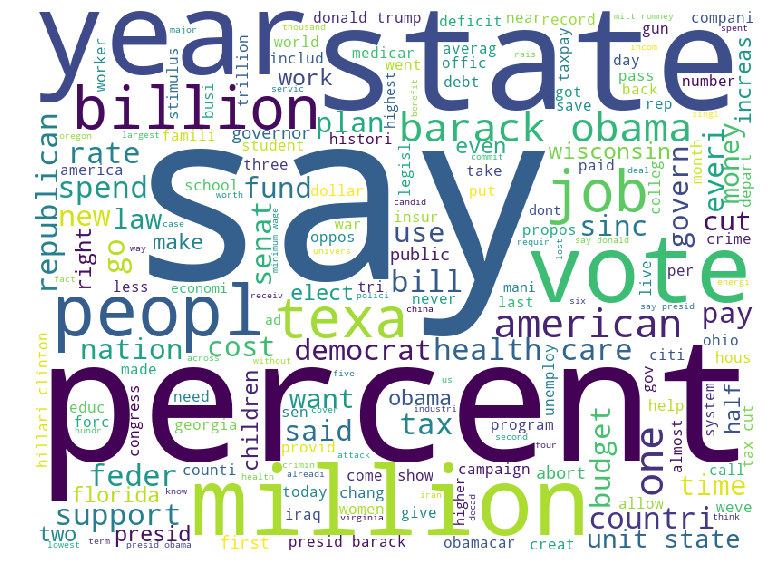

In [13]:
cloud(' '.join(test_news['clean']))

#### Inferences from visulaization: 
- The large words are the words that are frequently appeared in the text/corpus

#### SenticNet:  

> It provides polarity associated with 50,000 natural language concepts. A polarity is a floating number between -1 and +1. Minus one is extreme negativity, and plus one is extreme positivity. The knowledge base is free. It can be downloaded as XML file. 
SenticNet 5 reaches 100,000 commonsense concepts by employing recurrent neural networks to infer primitives by lexical substitution.



In [14]:
from sklearn.preprocessing import scale

sentic_net = pd.read_csv('input_data/senticnet5.txt', sep="\t+", header=None, usecols=[0,1,2], names = ["Token", "Polarity", "Intensity"])
sentic_net = sentic_net[~sentic_net['Token'].str.contains('|'.join('_'),na=False)]
sentic_net = sentic_net.reset_index(drop=True)
print("Senticnet Vocab Size: ",len(sentic_net))
print(sentic_net.head(10))

/Users/harinibalakrishnan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


Senticnet Vocab Size:  39891
         Token  Polarity  Intensity
0      abandon  negative      -0.84
1    abandoned  negative      -0.85
2  abandonment  negative      -0.82
3        abase  negative      -0.90
4    abasement  negative      -0.90
5        abash  negative      -0.77
6      abashed  negative      -0.92
7    abashment  negative      -0.76
8       abasia  negative      -0.67
9        abate  negative      -0.86


In [15]:
senti = (nltk.word_tokenize(train_news['clean'][0]))
print("\n Polarity of word - list : ", (sentic_net.loc[sentic_net.Token == senti[2]]).Polarity.any())
print("\n Intensity of word - list : ", float( (sentic_net.loc[sentic_net.Token == senti[2]]).Intensity ))


 Polarity of word - list :  positive

 Intensity of word - list :  0.11599999999999999


> A basic task in sentiment analysis is classifying the polarity of a given text at the document, sentence, or feature/aspect level—whether the expressed opinion in a document, a sentence or an entity feature/aspect is positive, negative, or neutral.

In [16]:
senti_word_vector = []
def create_sentiment_vector_of_sentence(sentence):
    sentence_sentiment_vector=np.array([])    
    pol_score=[]
    intensity = []
    
    for word in sentence:        
        token_lower = word.lower()
        lemma_token = nltk.WordNetLemmatizer().lemmatize(token_lower)        
        if token_lower is 'not':
            pol_score =  np.append(pol_score, -1)
            intensity =  np.append(intensity, -1)
            
        elif lemma_token in sentic_net.Token.values:
            sentic_net_object = sentic_net.loc[sentic_net.Token == lemma_token]
            polarity = -1 if sentic_net_object.Polarity.any()  == 'negative' else 1
            pol_score = np.append(pol_score, polarity)
            intensity = np.append(intensity, float(sentic_net_object.Intensity))

        else:
            pol_score =  np.append(pol_score, 0)
            intensity =  np.append(intensity, 0)
    pol_score = float(sum(pol_score))/len(pol_score)
    senti_word_vector.append(intensity)
    intensity = float(sum(intensity))/len(intensity)
    
    sentence_sentiment_vector = np.append(sentence_sentiment_vector,[pol_score, intensity])
    return sentence_sentiment_vector

In [17]:
sentiment_polarity = [] #vocab_scale,  sentic_net_polarity and intensity
sentiment_score = []
for index, row in train_news.iterrows():
    sentence = nltk.word_tokenize(row['clean'])
    sentiV = create_sentiment_vector_of_sentence(sentence)
    polarity = 1 if sentiV[0] > 0 else 0
    sentiment_polarity.append(polarity)
    sentiment_score.append(sentiV[1])

print("score: ", sentiment_score) # values will be between -1 and 1
print("polarity: ", sentiment_polarity) # 1 for positive and 0 for negative 

print(senti_word_vector)
# Add as a column to the dataset 
train_news['senti_score'] = sentiment_score
train_news['senti_polarity'] = sentiment_polarity

score:  [0.08959999999999999, -0.010785714285714287, 0.01575000000000001, 0.2501, 0.0252, -0.023666666666666666, 0.16866666666666666, 0.022466666666666656, 0.119, 0.12625, 0.25825, 0.165, 0.02800000000000001, 0.4383333333333333, 0.201375, 0.2508235294117647, 0.02278571428571429, 0.3511538461538462, 0.10391666666666667, -0.0004285714285714131, 0.1358181818181818, 0.317625, -0.05449999999999997, 0.37333333333333335, 0.361, 0.025750000000000002, -0.09066666666666667, 0.11646153846153846, 0.008571428571428572, 0.1648, 0.064, 0.12990000000000004, -0.055500000000000015, 0.1976, 0.47500000000000003, 0.26257142857142857, -0.059555555555555556, 0.24771428571428566, 0.16366666666666665, -0.2416923076923077, 0.08030769230769229, -0.15125, -0.0669090909090909, 0.07194444444444444, -0.061615384615384614, 0.3764444444444444, 0.0, -0.07200000000000001, 0.2136153846153846, 0.10444444444444444, 0.26815384615384613, 0.12642857142857142, 0.2292222222222222, 0.21505882352941177, 0.1136666666666667, 0.3926

[array([ 0.614,  0.   ,  0.116,  0.   ,  0.093,  0.12 ,  0.067,  0.   ,
       -0.87 ,  0.756]), array([ 0.   , -0.78 ,  0.08 ,  0.08 ,  0.   ,  0.943,  0.   ,  0.08 ,
        0.136,  0.   ,  0.   ,  0.   , -0.69 ,  0.   ]), array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.101,  0.805,  0.   ,
       -0.69 ,  0.153, -0.18 ,  0.   ]), array([ 0.857,  0.784, -0.89 ,  0.   ,  0.   ,  0.   ,  0.782,  0.968,
        0.   ,  0.   ]), array([0.   , 0.   , 0.08 , 0.046, 0.   ]), array([ 0.   ,  0.773,  0.08 ,  0.04 ,  0.067, -0.74 ,  0.148, -0.73 ,
        0.   ,  0.   ,  0.   , -0.03 ,  0.067, -0.03 ,  0.   ]), array([ 0.   ,  0.   ,  0.929,  0.823,  0.   , -0.74 ]), array([ 0.903,  0.801, -0.66 ,  0.   ,  0.067, -0.74 ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.856, -0.89 ,  0.   ,  0.   ]), array([ 0.   ,  0.   ,  0.182,  0.   ,  0.   ,  0.943, -0.03 ,  0.   ,
        0.   ,  0.624,  0.081,  0.   ,  0.   ,  0.   ,  0.104,  0.   ]), array([0.614, 0.   , 0.   , 0.   , 0.   , 0.   , 0

In [18]:
train_news['senti_word_vector'] =senti_word_vector

In [19]:
train_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,senti_score,senti_polarity,senti_word_vector
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimes...,0.089600,1,"[0.614, 0.0, 0.11599999999999999, 0.0, 0.09300..."
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,declin coal start start natur gas took start b...,-0.010786,1,"[0.0, -0.78, 0.08, 0.08, 0.0, 0.943, 0.0, 0.08..."
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre john mccain vote give geo...,0.015750,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.10099999999999999,..."
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl like mandat free sex...,0.250100,1,"[0.857, 0.784, -0.89, 0.0, 0.0, 0.0, 0.782, 0...."
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,0.025200,1,"[0.0, 0.0, 0.08, 0.046, 0.0]"


In [20]:
sentiment_polarity = [] #vocab_scale,  sentic_net_polarity and intensity
sentiment_score = []
senti_word_vector = []

for index, row in test_news.iterrows():
    sentence = nltk.word_tokenize(row['clean'])
    sentiV = create_sentiment_vector_of_sentence(sentence)
    polarity = 1 if sentiV[0] > 0 else 0
    sentiment_polarity.append(polarity)
    sentiment_score.append(sentiV[1])

# Add as a column to the dataset 
test_news['senti_score'] = sentiment_score
test_news['senti_polarity'] = sentiment_polarity
test_news['senti_word_vector'] =senti_word_vector

In [21]:
test_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,senti_score,senti_polarity,senti_word_vector
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall u mexico border take liter year,0.038000,1,"[0.8590000000000001, 0.05, 0.0, 0.0, 0.033, 0...."
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,-0.227167,0,"[0.0, 0.107, 0.0, -0.73, 0.0, -0.74]"
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,0.199571,1,"[0.614, 0.0, 0.0, 0.0, 0.0, 0.823, -0.04]"
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzann bonamici support plan cut choic medicar...,0.023778,1,"[0.0, 0.0, 0.12, 0.083, -0.05, 0.0, 0.0, 0.0, ..."
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether hes center crimin scheme vi...,0.118800,1,"[0.845, -0.83, 0.0, 0.0, 0.10400000000000001, ..."


### Bag of Words 

> Bag of Words is simply the matrix that counts how many each word appears in documents (disregard grammar and word order). In order to do that, we use "CountVectorizer" method in sklearn library. 

> As you know already, the number of vocabulary is very large so it is important to limit the size of the feature vectors. In this project, we use the 18000 most frequent words. Also, the other things to notice is that we set min_df = 2 and ngram_range = (1,3). min_df = 2 means in order to include the vocabulary in the matrix, one word must appear in at least two documents. ngram_range means we cut one sentence by number of ngram. 

> Let's say we have one sentence, I am a boy. If we cut the sentence by digram (ngram=2) then the sentence would be cut like this ["I am","am a", "a boy"]. The result of accuracy can be highly dependent on parameters so feel free to alter them and see if you can improve the score.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [23]:
# As mentioned many times, the matrix is going to be huge 
# so it would be a good idea to use Pipeline for encapsulating and avoiding a data leakage.
from sklearn.pipeline import Pipeline
pipe = Pipeline( [('vect', vectorizer)] )

In [24]:
# Complete form of bag of word for machine learning input. We will be using this for machine learning algorithms.
train_bw = pipe.fit_transform(train_news['clean'])

# We only call transform not fit_transform due to the risk of overfitting.
test_bw = pipe.transform(test_news['clean'])
print('train dim:', train_bw.shape, 'test dim:', test_bw.shape)

train dim: (10240, 7626) test dim: (1267, 7626)


In [25]:
# Get the name fo the features
countV_features = vectorizer.get_feature_names()
print(countV_features[:25])

['aa', 'aaa', 'aaron', 'aarp', 'aba', 'abandon', 'abba', 'abbott', 'abc', 'abdul', 'abedin', 'abel', 'abid', 'abil', 'abillion', 'abject', 'abl', 'aboard', 'abolish', 'abolit', 'abort', 'abortioneven', 'abortionist', 'abraham', 'abrahamlincoln']


In [26]:
# Instead of 1 and 0 representation, create the dataframe to see how many times each word appears (just sum of 1 of each row)

train_sum = pd.DataFrame(np.sum(train_bw, axis=0), columns = countV_features)
train_sum.head()

,aa,aaa,aaron,aarp,aba,abandon,abba,abbott,abc,abdul,...,zero,zika,zimmerman,zinn,zip,zippo,zombi,zone,zoo,zuckerberg
0,1,3,2,4,1,3,2,16,4,1,...,45,9,1,1,3,1,2,10,1,2


### Classifier Modeling using CountVectorizer 

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

##### Building Classifier using Naives Bayes regression

In [28]:
nb_pipeline = Pipeline([
        ('vector', vectorizer),
        ('mname',MultinomialNB())])

nb_pipeline.fit(train_news['clean'],train_news['senti_polarity'])
predicted_nb = nb_pipeline.predict(test_news['clean'])
np.mean(predicted_nb == test_news['senti_polarity'])

0.8768745067087609

#### Building Classifier using Logistic regression

In [29]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
logR_pipeline = Pipeline([
        ('vector',vectorizer),
        ('mname',LogisticRegression())
        ])
logR_pipeline.fit(train_news['clean'],train_news['senti_polarity'])
predicted_LogR = logR_pipeline.predict(test_news['clean'])
np.mean(predicted_LogR == test_news['senti_polarity'])

0.9242304656669298

##### Building Classifier using Linear SVM Classifier

In [30]:
svm_pipeline = Pipeline([
        ('vector',vectorizer),
        ('mname',svm.LinearSVC())
        ])

svm_pipeline.fit(train_news['clean'],train_news['senti_polarity'])
predicted_svm = svm_pipeline.predict(test_news['clean'])
np.mean(predicted_svm == test_news['senti_polarity'])

0.9392265193370166

##### Building Classifier using SVM Stochastic Gradient Descent on hinge loss

In [31]:
warnings.filterwarnings("ignore",category=DeprecationWarning)
sgd_pipeline = Pipeline([
        ('vector',vectorizer),
        ('mname',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5))
        ])

sgd_pipeline.fit(train_news['clean'],train_news['senti_polarity'])
predicted_sgd = sgd_pipeline.predict(test_news['clean'])
np.mean(predicted_sgd == test_news['senti_polarity'])

0.8981846882399369

##### Building Classifier using RandomForestClassifier

In [32]:
#random forest
random_forest = Pipeline([
        ('vector', vectorizer),
        ('mname',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
    
random_forest.fit(train_news['clean'],train_news['senti_polarity'])
predicted_rf = random_forest.predict(test_news['clean'])
np.mean(predicted_rf == test_news['senti_polarity'])

0.8610891870560379

### Models performance Comparison 

In [33]:
#User defined functon for K-Fold cross validatoin
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n_splits=5, random_state=None, shuffle=False)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for train_ind, test_ind in k_fold.split(train_news):
        train_text = train_news.iloc[train_ind]['clean'] 
        train_y = train_news.iloc[train_ind]['senti_polarity']
    
        test_text = train_news.iloc[test_ind]['clean']
        test_y = train_news.iloc[test_ind]['senti_polarity']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions)
        scores.append(score)
    
    return (print("Classifier Name: ", classifier.named_steps['mname']),
    print('Total statements classified:', len(train_news)),
    print('Accuracy:', sum(scores)/len(scores)),
    print('Confusion matrix:'),
    print(confusion),
    print("\n\n==========================================================\n"))

In [34]:
#K-fold cross validation for all classifiers
build_confusion_matrix(nb_pipeline)
build_confusion_matrix(logR_pipeline)
build_confusion_matrix(svm_pipeline)
build_confusion_matrix(sgd_pipeline)
build_confusion_matrix(random_forest)

Classifier Name:  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Total statements classified: 10240
Accuracy: 0.9216383913922968
Confusion matrix:
[[ 461 1214]
 [ 207 8358]]



Classifier Name:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Total statements classified: 10240
Accuracy: 0.9482000190175208
Confusion matrix:
[[ 989  686]
 [ 225 8340]]



Classifier Name:  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Total statements classified: 10240
Accuracy: 0.9495276690875969
Confusion matrix:
[[1209  466]
 [ 402 8163]]



Classifier Name:  SGDClassifier(alpha=0.001, average=False, class_weight

(None, None, None, None, None, None)

### Result:

- LinearSVC provides the maximum score among all the 5 models.
- The sentiment analysis with CounterVectorizer seems to be 95% accurate. 


#### [![NLTK Sentiment Intensity Analyzer]()](http://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html)
> VADER, or the **Valence Aware Dictionary and sEntiment Reasoner** has created a package that performes sentiment analysis using the polarity-based, where pieces of texts are classified as either positive or negative, or valence-based, where the intensity of the sentiment is taken into account. For example, the words ‘good’ and ‘excellent’ would be treated the same in a polarity-based approach, whereas ‘excellent’ would be treated as more positive than ‘good’ in a valence-based approach

- It is based on lexicons of sentiment-related word.
- The first three, positive, neutral and negative, represent the proportion of the text that falls into those categories.
- The final metric, the compound score, is the sum of all of the lexicon ratings which have been standardised to range between -1 and 1

In [35]:
import nltk.sentiment
warnings.filterwarnings("ignore",category=UserWarning)
senti = nltk.sentiment.vader.SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = senti.polarity_scores(sentence)
    print("{:-<40} \n{}".format(sentence, str(snt)))
    
print_sentiment_scores(train_news['clean'][0])

say anni list polit group support third trimest abort demand 
{'neg': 0.123, 'neu': 0.656, 'pos': 0.221, 'compound': 0.296}


/Users/harinibalakrishnan/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [36]:
def get_vader_polarity(snt):
    if not snt:
        return None
    elif snt['neg'] > snt['pos'] and snt['neg'] > snt['neu']:
        return -1
    elif snt['pos'] > snt['neg'] and snt['pos'] > snt['neu']:
        return 1
    else:
        return 0

In [37]:
#Function to determine if a text is negative(-1) or postive (1) or neutral (0)
def get_polarity_type(sentence):
    sentimentVector = []
    snt = senti.polarity_scores(sentence)
    sentimentVector.append(get_vader_polarity(snt))
    sentimentVector.append(snt['neg'])
    sentimentVector.append(snt['neu'])
    sentimentVector.append(snt['pos'])
    sentimentVector.append(snt['compound'])
    
    print(sentimentVector)
    return sentimentVector

In [38]:
sentiment = []
vader_pol = []
for row in train_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    
train_news['sentiment_vector'] = sentiment
train_news['vader_polarity'] = vader_pol

[0, 0.123, 0.656, 0.221, 0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.161, 0.645, 0.194, 0.128]
[1, 0.0, 0.438, 0.562, 0.8402]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.144, 0.778, 0.078, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.085, 0.915, 0.0, -0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.667, 0.333, 0.6124]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.322, 0.678, 0.0, -0.508]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.2, 0.522, 0.278, 0.2263]
[0, 0.116, 0.884, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.625, 0.375, 0.7184]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.68, 0.32, 0.5106]
[0, 0.0, 0.543, 0.457, 0.6369]
[0, 0.15, 0.429, 0.421, 0.5859]
[0, 0.0, 0.843, 0.157, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.507, 0.493, 0.0, -0.802]
[0, 0.0, 0.859, 0.141, 0.2411]
[0, 0.238, 0.495, 0.267, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.199, 0.588, 0.213, 0.0516]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.184, 0.702, 0.114, -0.2033]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0,

[0, 0.245, 0.755, 0.0, -0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.11, 0.8, 0.09, -0.1531]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.133, 0.759, 0.108, -0.1027]
[0, 0.217, 0.783, 0.0, -0.3612]
[0, 0.132, 0.708, 0.16, 0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.854, 0.146, 0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.859, 0.141, 0.2023]
[0, 0.0, 0.815, 0.185, 0.34]
[0, 0.116, 0.601, 0.283, 0.5994]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.149, 0.851, 0.0, -0.1027]
[0, 0.0, 0.794, 0.206, 0.0772]
[0, 0.0, 0.61, 0.39, 0.7506]
[0, 0.108, 0.735, 0.157, 0.25]
[0, 0.0, 0.694, 0.306, 0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.119, 0.734, 0.147, 0.128]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.231, 0.769, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.245, 0.755, 0.0, -0.5994]
[0, 0.113, 0.887, 0.0, -0.3182]
[0, 0.238, 0.645, 0.117, -0.4588]
[0, 0.298, 0.702, 0.0, -0.5267]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.196

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.276, 0.573, 0.151, -0.34]
[0, 0.363, 0.637, 0.0, -0.8442]
[0, 0.0, 0.792, 0.208, 0.2732]
[0, 0.426, 0.453, 0.121, -0.8442]
[0, 0.455, 0.545, 0.0, -0.6124]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.328, 0.672, 0.0, -0.5994]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.661, 0.339, 0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.709, 0.291, 0.5719]
[0, 0.348, 0.536, 0.116, -0.5574]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.299, 0.701, 0.0, -0.6908]
[0, 0.277, 0.723, 0.0, -0.3182]
[0, 0.223, 0.777, 0.0, -0.3182]
[0, 0.12, 0.88, 0.0, -0.128]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.251, 0.673, 0.076, -0.5994]
[0, 0.0, 0.536, 0.464, 0.6369]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.885, 0.115, 0.0772]
[0, 0.0, 0.84, 0.16, 0.2732]
[0, 0.154, 0.846, 0.0, -0.25]
[0, 0.344, 0.656, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.787, 0.213, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.18

[1, 0.271, 0.353, 0.376, 0.2263]
[-1, 0.539, 0.461, 0.0, -0.8481]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.231, 0.769, 0.0, -0.4019]
[0, 0.09, 0.789, 0.12, 0.2023]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.889, 0.111, 0.128]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.077, 0.773, 0.149, 0.3182]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.253, 0.385, 0.363, 0.4588]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.128, 0.734, 0.138, 0.0258]
[0, 0.0, 0.738, 0.262, 0.4939]
[0, 0.0, 0.693, 0.307, 0.7351]
[0, 0.27, 0.652, 0.078, -0.6597]
[0, 0.271, 0.729, 0.0, -0.3818]
[0, 0.231, 0.769, 0.0, -0.5994]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.16, 0.84, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.833, 0.167, 0.3818]
[0, 0.0, 0.69, 0.31, 0.2023]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.698, 0.302, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.674, 0.326, 0.4404]
[1, 0.0, 0.404, 0.596, 0.7096]
[0, 0.0, 0.69, 0.31, 0.2023]
[0, 0.0, 0.

[0, 0.102, 0.682, 0.216, 0.4588]
[0, 0.0, 0.526, 0.474, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.861, 0.139, 0.3089]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.652, 0.348, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.593, 0.407, 0.0, -0.8074]
[0, 0.417, 0.583, 0.0, -0.6124]
[0, 0.366, 0.634, 0.0, -0.6369]
[0, 0.0, 0.847, 0.153, 0.2023]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.838, 0.162, 0.4019]
[0, 0.0, 0.881, 0.119, 0.2263]
[0, 0.172, 0.828, 0.0, -0.3612]
[0, 0.213, 0.787, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.844, 0.156, 0.34]
[0, 0.187, 0.755, 0.057, -0.6486]
[0, 0.282, 0.718, 0.0, -0.6249]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.738, 0.262, 0.4939]
[-1, 0.671, 0.143, 0.186, -0.6597]
[0, 0.0, 0.888, 0.112, 0.2263]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.1, 0.9, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.214, 0.51, 0.276, 0.1531]
[0, 0.318, 0.682, 0.0, -0.4215]


[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.375, 0.625, 0.0, -0.8402]
[0, 0.231, 0.769, 0.0, -0.34]
[0, 0.142, 0.541, 0.318, 0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.269, 0.502, 0.229, -0.1206]
[0, 0.208, 0.792, 0.0, -0.2732]
[0, 0.274, 0.438, 0.288, 0.066]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.075, 0.753, 0.172, 0.4215]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.804, 0.196, 0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.277, 0.504, 0.218, -0.1779]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.881, 0.119, 0.2263]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.789, 0.211, 0.5773]
[-1, 0.513, 0.256, 0.231, -0.5106]
[0, 0.274, 0.598, 0.128, -0.34]
[-1, 0.42, 0.2, 0.38, -0.0516]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.277, 0.723, 0.0, -0.3182]
[0, 0.136, 0.593, 0.271, 0.3818]
[0, 0.082, 0.819, 0.1, 0.25]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.28, 0.72, 0.0, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.84, 0.1

[0, 0.0, 0.874, 0.126, 0.0772]
[0, 0.0, 0.663, 0.337, 0.6808]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.167, 0.833, 0.0, -0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.909, 0.091, 0.0772]
[0, 0.0, 0.823, 0.177, 0.2023]
[0, 0.317, 0.683, 0.0, -0.7845]
[-1, 0.423, 0.309, 0.268, -0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.802, 0.198, 0.4939]
[0, 0.0, 0.89, 0.11, 0.2732]
[0, 0.26, 0.74, 0.0, -0.6007]
[0, 0.365, 0.635, 0.0, -0.7845]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.211, 0.789, 0.0, -0.34]
[0, 0.286, 0.714, 0.0, -0.3818]
[0, 0.18, 0.82, 0.0, -0.296]
[0, 0.215, 0.678, 0.107, -0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.632, 0.368, 0.0, -0.8225]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.775, 0.225, 0.4404]
[0, 0.0, 0.784, 0.216, 0.5267]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.128, 0.872, 0.0, -0.296]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.69, 0.31, 0.2023]
[0, 0.0, 0.755, 0.245, 0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.351, 0.448, 0.201, -0.4588

[0, 0.174, 0.826, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.407, 0.359, 0.234, -0.5994]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.036, 0.514, 0.45, 0.9524]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.753, 0.247, 0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.141, 0.859, 0.0, -0.3182]
[0, 0.0, 0.696, 0.304, 0.5423]
[0, 0.467, 0.533, 0.0, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.237, 0.412, 0.351, 0.2732]
[0, 0.208, 0.625, 0.167, 0.0516]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.828, 0.172, 0.4019]
[0, 0.269, 0.613, 0.118, -0.4939]
[0, 0.0, 0.633, 0.367, 0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.12, 0.88, 0.0, -0.4588]
[0, 0.271, 0.471, 0.259, -0.0258]
[0, 0.423, 0.577, 0.0, -0.6597]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.704, 0.296, 0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.

[0, 0.271, 0.729, 0.0, -0.3818]
[0, 0.152, 0.652, 0.196, 0.1027]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.252, 0.748, 0.0, -0.4019]
[0, 0.0, 0.753, 0.247, 0.3182]
[0, 0.0, 0.847, 0.153, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.2, 0.56, 0.24, 0.128]
[0, 0.448, 0.552, 0.0, -0.7964]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.802, 0.198, 0.4939]
[0, 0.0, 0.726, 0.274, 0.5994]
[0, 0.157, 0.714, 0.129, -0.1027]
[0, 0.32, 0.68, 0.0, -0.6908]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.728, 0.272, 0.6249]
[0, 0.28, 0.466, 0.254, -0.0557]
[-1, 0.596, 0.404, 0.0, -0.7096]
[0, 0.0, 0.769, 0.231, 0.2732]
[0, 0.212, 0.788, 0.0, -0.5423]
[-1, 0.502, 0.167, 0.331, -0.6249]
[0, 0.0, 0.722, 0.278, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.091, 0.909, 0.0

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.758, 0.242, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.309, 0.526, 0.164, -0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.16, 0.84, 0.0, -0.2732]
[0, 0.0, 0.833, 0.167, 0.5267]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.675, 0.325, 0.6486]
[0, 0.229, 0.619, 0.152, -0.1531]
[0, 0.219, 0.651, 0.13, -0.4404]
[0, 0.0, 0.667, 0.333, 0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.302, 0.698, 0.0, -0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.214, 0.714, 0.071, -0.5574]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.156, 0.622, 0.222, 0.128]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.161, 0.645, 0.194, 0.128]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.394, 0.606, 0.0, -0.5994]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.735, 0.265, 0.6597]
[0, 0.32, 0.68, 0.0, -0.6908]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.081, 0.581, 

[-1, 0.362, 0.357, 0.281, -0.3818]
[0, 0.333, 0.667, 0.0, -0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.355, 0.58, 0.065, -0.8402]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.175, 0.649, 0.175, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.457, 0.543, 0.0, -0.9153]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.847, 0.153, 0.2023]
[0, 0.161, 0.839, 0.0, -0.3182]
[0, 0.17, 0.83, 0.0, -0.3089]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.252, 0.629, 0.119, -0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.286, 0.714, 0.0, -0.4939]
[0, 0.0, 0.843, 0.157, 0.0772]
[0, 0.226, 0.774, 0.0, -0.5423]
[0, 0.328, 0.672, 0.0, -0.5994]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.729, 0.271, 0.6369]
[0, 0.0, 0.722, 0.278, 0.4019]
[0, 0.155, 0.773, 0.072, -0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.202, 0.707, 0.092, -0.2928]
[0, 0.107, 0.687, 0.206, 0.3182]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.529, 0.471, 0.0, -0.5423]
[0, 0.27, 0.6, 0.13, -0.34]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]


[0, 0.126, 0.632, 0.242, 0.296]
[0, 0.0, 0.633, 0.367, 0.4404]
[0, 0.256, 0.744, 0.0, -0.4767]
[0, 0.239, 0.761, 0.0, -0.296]
[0, 0.0, 0.828, 0.172, 0.3612]
[0, 0.0, 0.612, 0.388, 0.5859]
[0, 0.159, 0.841, 0.0, -0.5267]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.272, 0.728, 0.0, -0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.68, 0.32, 0.5106]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.722, 0.278, 0.4019]
[0, 0.0, 0.727, 0.273, 0.4588]
[0, 0.29, 0.611, 0.099, -0.5423]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.231, 0.769, 0.0, -0.4019]
[0, 0.241, 0.463, 0.296, 0.1531]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.294, 0.706, 0.0, -0.3612]
[0, 0.231, 0.769, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.422, 0.578, 0.0, -0.8591]
[0, 0.16, 0.84, 0.0, -0.2732]
[0, 0.259, 0.741, 0.0, -0.4215]
[0, 0.235, 0.765, 0.0, -0.6486]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.126, 0.874, 0.0, -0.3182]
[0, 0.0, 0.738, 0.262, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.769, 0.231, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.86, 0.14, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.

[0, 0.286, 0.714, 0.0, -0.5574]
[0, 0.0, 0.58, 0.42, 0.8271]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.215, 0.785, 0.0, -0.6369]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.796, 0.204, 0.0, -0.8316]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.753, 0.247, 0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.675, 0.325, 0.6486]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.358, 0.642, 0.0, -0.5994]
[0, 0.0, 0.708, 0.292, 0.5106]
[0, 0.231, 0.769, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.215, 0.675, 0.11, -0.4019]
[0, 0.167, 0.833, 0.0, -0.34]
[0, 0.0, 1.0, 0.0, 0.0]
[1, 0.0, 0.439, 0.561, 0.7506]
[-1, 0.609, 0.391, 0.0, -0.872]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.758, 0.242, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.34, 0.512, 0.149, -0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.847, 0.153, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.173, 0.827, 0.0, -0.3182]
[0, 0.236, 0.606, 0.158, -0.0772

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.406, 0.594, 0.0, -0.6249]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.394, 0.606, 0.0, -0.8316]
[0, 0.194, 0.806, 0.0, -0.34]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.798, 0.202, 0.4215]
[0, 0.0, 0.85, 0.15, 0.3182]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.678, 0.322, 0.6908]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.282, 0.516, 0.203, -0.4574]
[0, 0.0, 0.725, 0.275, 0.2263]
[0, 0.0, 0.526, 0.474, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.769, 0.231, 0.4019]
[0, 0.0, 0.738, 0.262, 0.4939]
[0, 0.0, 0.729, 0.271, 0.3818]
[0, 0.0, 0.71, 0.29, 0.5994]
[0, 0.0, 0.714, 0.286, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.094, 0.512, 0.394, 0.765]
[0, 0.431, 0.569, 0.0, -0.7246]
[0, 0.315, 0.685, 0.0, -0.3182]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.86, 0.14, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[1, 0.0, 0.448, 0.552, 0.8126]
[0

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.394, 0.606, 0.0, -0.8442]
[-1, 0.609, 0.391, 0.0, -0.8979]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.649, 0.351, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.758, 0.242, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.121, 0.694, 0.185, 0.2732]
[0, 0.0, 0.879, 0.121, 0.0258]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.84, 0.16, 0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.233, 0.388, 0.38, 0.2263]
[0, 0.0, 0.822, 0.178, 0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.437, 0.329, 0.235, -0.6486]
[0, 0.0, 0.68, 0.32, 0.5106]
[0, 0.212, 0.57, 0.218, 0.0258]
[0, 0.174, 0.826, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.86, 0.14, 0.0772]
[0, 0.0, 0.613, 0.387, 0.802]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.213, 0.54, 0.247, 0.4374]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.36, 0.64, 0.0, -0.8074]
[0, 0.263, 0.737, 0.0, -0.3612]
[-1, 0.538, 0.462, 0.0, -0.5423]
[0, 0.361, 0.412, 0.227, -0.3182]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 

[0, 0.348, 0.536, 0.116, -0.5574]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.31, 0.69, 0.0, -0.4019]
[0, 0.322, 0.678, 0.0, -0.5859]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.847, 0.153, 0.2023]
[0, 0.32, 0.68, 0.0, -0.5106]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.227, 0.773, 0.0, -0.6124]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.885, 0.115, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.838, 0.162, 0.4019]
[0, 0.0, 0.677, 0.323, 0.7351]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.266, 0.734, 0.0, -0.6908]
[0, 0.0, 0.769, 0.231, 0.6369]
[0, 0.259, 0.741, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.296, 0.704, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.149, 0.851, 0.0, -0.2732]
[0, 0.342, 0.658, 0.0, -0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.189, 0.811, 0.0, -0.1027]
[0, 0.0, 0.822, 0.178, 0.0772]
[0, 0.0,

[0, 0.329, 0.671, 0.0, -0.4404]
[0, 0.0, 0.775, 0.225, 0.4939]
[0, 0.0, 0.748, 0.252, 0.4019]
[0, 0.231, 0.769, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.795, 0.205, 0.2023]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.513, 0.487, 0.0, -0.9287]
[0, 0.0, 0.886, 0.114, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.364, 0.636, 0.0, -0.4588]
[0, 0.299, 0.701, 0.0, -0.5719]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.92, 0.08, 0.0772]
[0, 0.314, 0.686, 0.0, -0.6597]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[-1, 0.615, 0.385, 0.0, -0.5859]
[0, 0.111, 0.889, 0.0, -0.3089]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.494, 0.506, 0.0, -0.5994]
[0, 0.337, 0.663, 0.0, -0.6808]
[0, 0.147, 0.629, 0.224, 0.2732]
[0, 0.161, 0.839, 0.0, -0.3182]
[0, 0.161, 0.839, 0.0, -0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.857, 0.143, 0.3612]
[0, 0.091, 0.

[0, 0.124, 0.699, 0.177, 0.25]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.268, 0.732, 0.0, -0.296]
[0, 0.167, 0.833, 0.0, -0.296]
[0, 0.0, 0.597, 0.403, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.099, 0.782, 0.119, 0.128]
[0, 0.241, 0.567, 0.191, -0.1779]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.864, 0.136, 0.0258]
[0, 0.18, 0.82, 0.0, -0.5106]
[0, 0.281, 0.719, 0.0, -0.5994]
[0, 0.302, 0.698, 0.0, -0.7783]
[0, 0.251, 0.749, 0.0, -0.6908]
[0, 0.141, 0.859, 0.0, -0.2023]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.629, 0.371, 0.575]
[0, 0.23, 0.637, 0.132, -0.4588]
[0, 0.189, 0.811, 0.0, -0.1027]
[0, 0.0, 0.811, 0.189, 0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.565, 0.435, 0.6597]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.721, 0.279, 0.4767]
[0, 0.303, 0.506, 0.191, -0.25]
[0, 0.0, 0.795, 0.205, 0.3818]
[0, 0.102, 0.725, 0.172, 0.1386]
[0, 0.104, 0.896, 0.0, -0.1027]
[0, 0.273, 0.727, 0.0, -0.4588]
[0, 0.0, 0.789, 0.211, 0.4939]
[0

In [39]:
train_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,senti_score,senti_polarity,senti_word_vector,sentiment_vector,vader_polarity
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say anni list polit group support third trimes...,0.089600,1,"[0.614, 0.0, 0.11599999999999999, 0.0, 0.09300...","[0.123, 0.656, 0.221, 0.296]",0
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,declin coal start start natur gas took start b...,-0.010786,1,"[0.0, -0.78, 0.08, 0.08, 0.0, 0.943, 0.0, 0.08...","[0.0, 1.0, 0.0, 0.0]",0
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillari clinton agre john mccain vote give geo...,0.015750,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.10099999999999999,...","[0.161, 0.645, 0.194, 0.128]",0
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legisl like mandat free sex...,0.250100,1,"[0.857, 0.784, -0.89, 0.0, 0.0, 0.0, 0.782, 0....","[0.0, 0.438, 0.562, 0.8402]",1
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,econom turnaround start end term,0.025200,1,"[0.0, 0.0, 0.08, 0.046, 0.0]","[0.0, 1.0, 0.0, 0.0]",0


In [40]:
sentiment = []
vader_pol = []
for row in test_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    
    
test_news['sentiment_vector'] = sentiment
test_news['vader_polarity'] = vader_pol

[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.794, 0.206, 0.0772]
[0, 0.0, 0.69, 0.31, 0.4019]
[0, 0.178, 0.593, 0.229, 0.1531]
[0, 0.0, 0.838, 0.162, 0.4019]
[0, 0.0, 0.812, 0.188, 0.4588]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.239, 0.645, 0.116, -0.4404]
[0, 0.0, 0.822, 0.178, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.279, 0.721, 0.0, -0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.195, 0.805, 0.0, -0.5267]
[0, 0.351, 0.36, 0.288, -0.1779]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.84, 0.16, 0.2263]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.822, 0.178, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.241, 0.759, 0.0, -0.5859]
[0, 0.0, 0.737, 0.263, 0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.642, 0.358, 0.5994]
[0, 0.0, 0.921, 0.079, 0.0516]
[0, 0.277, 0.566, 0.157, -0.4404]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.769, 0.231, 0.4588]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.168, 0.611, 0.221, 0.1779]
[0, 0.296, 0.704, 0.0, -0.2732]
[0, 0.13

[0, 0.0, 0.732, 0.268, 0.296]
[0, 0.271, 0.729, 0.0, -0.3818]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.722, 0.278, 0.4019]
[-1, 0.51, 0.49, 0.0, -0.743]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.228, 0.614, 0.158, -0.2023]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.169, 0.508, 0.322, 0.4019]
[1, 0.0, 0.426, 0.574, 0.6597]
[0, 0.118, 0.742, 0.14, -0.128]
[0, 0.0, 0.698, 0.302, 0.3818]
[0, 0.231, 0.769, 0.0, -0.4019]
[0, 0.259, 0.741, 0.0, -0.2732]
[0, 0.0, 0.706, 0.294, 0.3612]
[0, 0.071, 0.808, 0.121, 0.25]
[0, 0.258, 0.538, 0.204, -0.128]
[0, 0.0, 0.847, 0.153, 0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.259, 0.741, 0.0, -0.2732]
[0, 0.183, 0.711, 0.107, -0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.677, 0.323, 0.5106]
[0, 0.167, 0.833, 0.0, -0.1027]
[-1, 0.545, 0.455, 0.0, -0.8625]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.192, 0.808, 0.0, -0.1695]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.246, 0.599, 0.156, -0.3612]
[0, 0.0, 0.913, 0.087, 0.2732]
[0, 0.116, 0.884, 0.0, -0.3

[0, 0.252, 0.748, 0.0, -0.4019]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.304, 0.585, 0.111, -0.5106]
[0, 0.0, 0.874, 0.126, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.702, 0.298, 0.34]
[0, 0.0, 0.612, 0.388, 0.4215]
[1, 0.0, 0.473, 0.527, 0.836]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.248, 0.752, 0.0, -0.5106]
[1, 0.0, 0.482, 0.518, 0.8225]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.199, 0.801, 0.0, -0.357]
[0, 0.0, 0.69, 0.31, 0.6597]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.245, 0.644, 0.112, -0.4767]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.133, 0.727, 0.139, 0.0258]
[0, 0.494, 0.506, 0.0, -0.8316]
[0, 0.0, 0.826, 0.174, 0.2732]
[0, 0.179, 0.636, 0.185, 0.0258]
[0, 0.474, 0.526, 0.0, -0.802]
[0, 0.417, 0.583, 0.0, -0.6486]
[0, 0.274, 0.726, 0.0, -0.5267]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.191, 0.506, 0.303, 0.25]
[0, 0.0, 0.722, 0.278, 0.4019]
[0, 0.429, 0.571, 0.0, -0.3089]
[0, 0.229, 0.625, 0.146, -0.25]
[0, 0.278, 0.722, 

In [41]:
test_news.head(5)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,senti_score,senti_polarity,senti_word_vector,sentiment_vector,vader_polarity
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview,build wall u mexico border take liter year,0.038000,1,"[0.8590000000000001, 0.05, 0.0, 0.0, 0.033, 0....","[0.0, 1.0, 0.0, 0.0]",0
1,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference,wisconsin pace doubl number layoff year,-0.227167,0,"[0.0, 0.107, 0.0, -0.73, 0.0, -0.74]","[0.0, 0.794, 0.206, 0.0772]",0
2,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.,say john mccain done noth help vet,0.199571,1,"[0.614, 0.0, 0.0, 0.0, 0.0, 0.823, -0.04]","[0.0, 0.69, 0.31, 0.4019]",0
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show,suzann bonamici support plan cut choic medicar...,0.023778,1,"[0.0, 0.0, 0.12, 0.083, -0.05, 0.0, 0.0, 0.0, ...","[0.178, 0.593, 0.229, 0.1531]",0
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video,ask report whether hes center crimin scheme vi...,0.118800,1,"[0.845, -0.83, 0.0, 0.0, 0.10400000000000001, ...","[0.0, 0.838, 0.162, 0.4019]",0


### TF-IDF

> TF-IDF (Term Frequency - Inverse Document Frequency) can be represented tf(d,t) X idf(t). TF-IDF uses the method diminishing the weight (importance) of words appeared in many documents in common, considered them incapable of discerning the documents, rather than simply counting the frequency of words as CountVectorizer does. The outcome matrix consists of each document (row) and each word (column) and the importance (weight) computed by tf * idf (values of the matrix)

##### N-gram
> So far we have used bag of words technique to extract the features and passed those featuers into classifiers. We have also seen the f1 scores of these classifiers. now lets enhance these features using term frequency weights with various n-grams

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfV = TfidfVectorizer(ngram_range = (1,3), sublinear_tf = True)

In [43]:
train_tfidf = tfidfV.fit_transform(train_news['clean'])
print('Training dim:', train_tfidf.shape)
print(train_tfidf.A[:10])

test_tfidf = tfidfV.fit_transform(test_news['clean'])
print('Test dim:', test_tfidf.shape)
print(test_tfidf.A[:10])

Training dim: (10240, 153677)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Test dim: (1267, 24601)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
tfidfV.vocabulary_

{'build': 2456,
 'wall': 23375,
 'mexico': 12692,
 'border': 2168,
 'take': 21058,
 'liter': 11711,
 'year': 24322,
 'build wall': 2468,
 'wall mexico': 23378,
 'mexico border': 12693,
 'border take': 2181,
 'take liter': 21078,
 'liter year': 11720,
 'build wall mexico': 2469,
 'wall mexico border': 23379,
 'mexico border take': 12695,
 'border take liter': 2182,
 'take liter year': 21079,
 'wisconsin': 23843,
 'pace': 14754,
 'doubl': 5958,
 'number': 13958,
 'layoff': 11298,
 'wisconsin pace': 23883,
 'pace doubl': 14755,
 'doubl number': 5965,
 'number layoff': 13972,
 'layoff year': 11299,
 'wisconsin pace doubl': 23884,
 'pace doubl number': 14756,
 'doubl number layoff': 5966,
 'number layoff year': 13973,
 'say': 18475,
 'john': 10683,
 'mccain': 12424,
 'done': 5899,
 'noth': 13908,
 'help': 9260,
 'vet': 23006,
 'say john': 18673,
 'john mccain': 10696,
 'mccain done': 12431,
 'done noth': 5906,
 'noth help': 13919,
 'help vet': 9296,
 'say john mccain': 18674,
 'john mccain 

In [45]:
tfidf_feature = tfidfV.get_feature_names()
print(tfidf_feature[:25])

['aaa', 'aaa bond', 'aaa bond rate', 'abbott', 'abbott activ', 'abbott activ state', 'abel', 'abel spent', 'abel spent taxpay', 'abercrombi', 'abercrombi made', 'abercrombi made late', 'abil', 'abil stimul', 'abil stimul job', 'abl', 'abl fool', 'abl fool peopl', 'abl keep', 'abl pool', 'abl pool improv', 'abl sharpli', 'abl sharpli curtail', 'aboard', 'aboard florida']


### Classifier Modeling using TF-IDF Vectorizer 

##### Building Classifier using Naives Bayes regression

In [46]:
nb_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',MultinomialNB())])

nb_pipeline_ngram.fit(train_news['clean'], train_news['vader_polarity'])
predicted_nb = nb_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_nb == test_news['vader_polarity'])

0.9558011049723757

#### Building Classifier using Logistic regression

In [47]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
logR_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',LogisticRegression())
        ])
logR_pipeline_ngram.fit(train_news['clean'],train_news['vader_polarity'])
predicted_LogR = logR_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_LogR == test_news['vader_polarity'])

0.9558011049723757

##### Building Classifier using Linear SVM Classifier

In [48]:
svm_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',svm.LinearSVC())
        ])

svm_pipeline_ngram.fit(train_news['clean'],train_news['vader_polarity'])
predicted_svm = svm_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_svm == test_news['vader_polarity'])

0.9700078926598263

##### Building Classifier using SVM Stochastic Gradient Descent on hinge loss

In [49]:
warnings.filterwarnings("ignore",category=DeprecationWarning)
sgd_pipeline_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5))
        ])

sgd_pipeline_ngram.fit(train_news['clean'],train_news['vader_polarity'])
predicted_sgd = sgd_pipeline_ngram.predict(test_news['clean'])
np.mean(predicted_sgd == test_news['vader_polarity'])

0.9558011049723757

##### Building Classifier using RandomForestClassifier

In [50]:
#random forest
random_forest_ngram = Pipeline([
        ('vector', tfidfV),
        ('mname',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])
    
random_forest_ngram.fit(train_news['clean'],train_news['vader_polarity'])
predicted_rf = random_forest_ngram.predict(test_news['clean'])
np.mean(predicted_rf == test_news['vader_polarity'])

0.9621152328334649

### Models performance Comparison 

In [51]:
#User defined functon for K-Fold cross validatoin
def build_confusion_matrix(classifier):
    
    k_fold = KFold(n_splits=5, random_state=None, shuffle=False)
    scores = []
    confusion = np.array([[0,0,0],[0,0,0],[0,0,0]])

    for train_ind, test_ind in k_fold.split(train_news):
        train_text = train_news.iloc[train_ind]['clean'] 
        train_y = train_news.iloc[train_ind]['vader_polarity']
    
        test_text = train_news.iloc[test_ind]['clean']
        test_y = train_news.iloc[test_ind]['vader_polarity']
        
        classifier.fit(train_text,train_y)
        predictions = classifier.predict(test_text)
        
        confusion += confusion_matrix(test_y,predictions)
        score = f1_score(test_y,predictions, average='micro')
        scores.append(score)
    
    return (print("Classifier Name: ", classifier.named_steps['mname']),
    print('Total statements classified:', len(train_news)),
    print('Accuracy:', sum(scores)/len(scores)),
    print('Confusion matrix:'),
    print(confusion),
    print("\n\n==========================================================\n"))

In [52]:
#K-fold cross validation for all classifiers
build_confusion_matrix(nb_pipeline_ngram)
build_confusion_matrix(logR_pipeline_ngram)
build_confusion_matrix(svm_pipeline_ngram)
build_confusion_matrix(sgd_pipeline_ngram)
build_confusion_matrix(random_forest_ngram)

Classifier Name:  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Total statements classified: 10240
Accuracy: 0.95869140625
Confusion matrix:
[[   0  280    0]
 [   0 9817    0]
 [   0  143    0]]



Classifier Name:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Total statements classified: 10240
Accuracy: 0.95869140625
Confusion matrix:
[[   0  280    0]
 [   0 9817    0]
 [   0  143    0]]



Classifier Name:  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Total statements classified: 10240
Accuracy: 0.96708984375
Confusion matrix:
[[  92  188    0]
 [  19 9794    4]
 [   1  125   17]]



Cla

(None, None, None, None, None, None)

### Result:

- LinearSVC provides the maximum score among all the 5 models.
- The sentiment analysis with TF-IDF Vectorizer seems to be 97% accurate. 

### Word2Vec 

> n general, there are two types of architecture options: skip-gram (default) and CBOW (continuous bag of words). Most of time, skip-gram is little bit slower but has more accuracy than CBOW. CBOW is the method to predict one word by whole text; therefore, small set of data is more favorable. On the other hand, skip-gram is totally opposite to CBOW. With the target word, skip-gram is the method to predict the words around the target words. The more data we have, the better it performs. As the architecture, there are two training algorithms for Word2Vec: Hierarchical softmax (default) and negative sampling. We will be using the default.

In [53]:
from gensim.models import word2vec
num_features = 400
min_count = 40
num_processor = 4
context = 10
downsampling = 0.001

**Worker threads :** Number of parallel processes to run. One thing to remember here is that unlike sklearn, it does not accept -1 option to use all the processors. 

**Downsampling of frequent words :** According to the Google documentation, values between 0.00001 and 0.001 would suffice. 

**Context :** How many words around the target word will be used? 

**Minimum word count:** This helps limit the size of the vocabulary to meaningful words. Any word that does not occur at least this many times across all documents is ignored. Reasonable values could be between 10 and 100. The reason why I chose 40 is that there are 30 reviews in each movie and repeat the title 30 times; therefore in order to avoid attaching too much importance to individual movie titles, I set to 40. 

In [54]:
train_words = []
test_words = [] 

# Append all the cleaned words
for news in train_news['clean']:
    train_words.append(news.split())
# print(train_words)   

# Append all the cleaned words
for news in test_news['clean']:
    test_words.append(news.split())
# print(test_words)   

In [55]:
train_w2v = word2vec.Word2Vec(train_words, workers = num_processor, 
                         size = num_features, min_count = min_count,
                         window = context, sample = downsampling)

In [56]:
# Unload unneccessary memory once the learning process is done.
train_w2v.init_sims(replace = True)

In [57]:
train_w2v.most_similar("trump")

[('donald', 0.9851034283638),
 ('said', 0.971734881401062),
 ('clinton', 0.967073917388916),
 ('say', 0.9657163023948669),
 ('hillari', 0.9642744064331055),
 ('want', 0.9628081321716309),
 ('support', 0.9573585987091064),
 ('campaign', 0.9547762274742126),
 ('mccain', 0.9507980942726135),
 ('candid', 0.950069785118103)]

#### Visualization

> As the Word2Vec has more than two features, it is hard to directly plot the whole data. We will be using the technique called t-SNE so that we can reduce the dimensions from 250 to 2, which enables to visualize more human-friendly and see the relationship among points (words).

In [58]:
# Import libraries
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore",category=RuntimeWarning)

# List of vocabulary.

vocab = list(train_w2v.wv.vocab)

# index vector values by corresponding vocab list

X = train_w2v[vocab]

print("Total Number of Vocab:", len(X))
print()
print(X[0][:10])

# Visualize only 100 words.

tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X[:100,:])


Total Number of Vocab: 547

[-0.06248299 -0.03337191 -0.05293784  0.03722918 -0.06186876 -0.12187072
  0.01270837 -0.00095711  0.01766438 -0.06185457]


In [59]:
df = pd.DataFrame(X_tsne, index = vocab[:100], columns = ['X','Y'])
df.head()

,X,Y
say,-7.938834,-2.865351
polit,-2.218031,-1.958328
group,-2.221429,-2.128174
support,-7.180386,-2.929317
third,2.213845,-0.635023


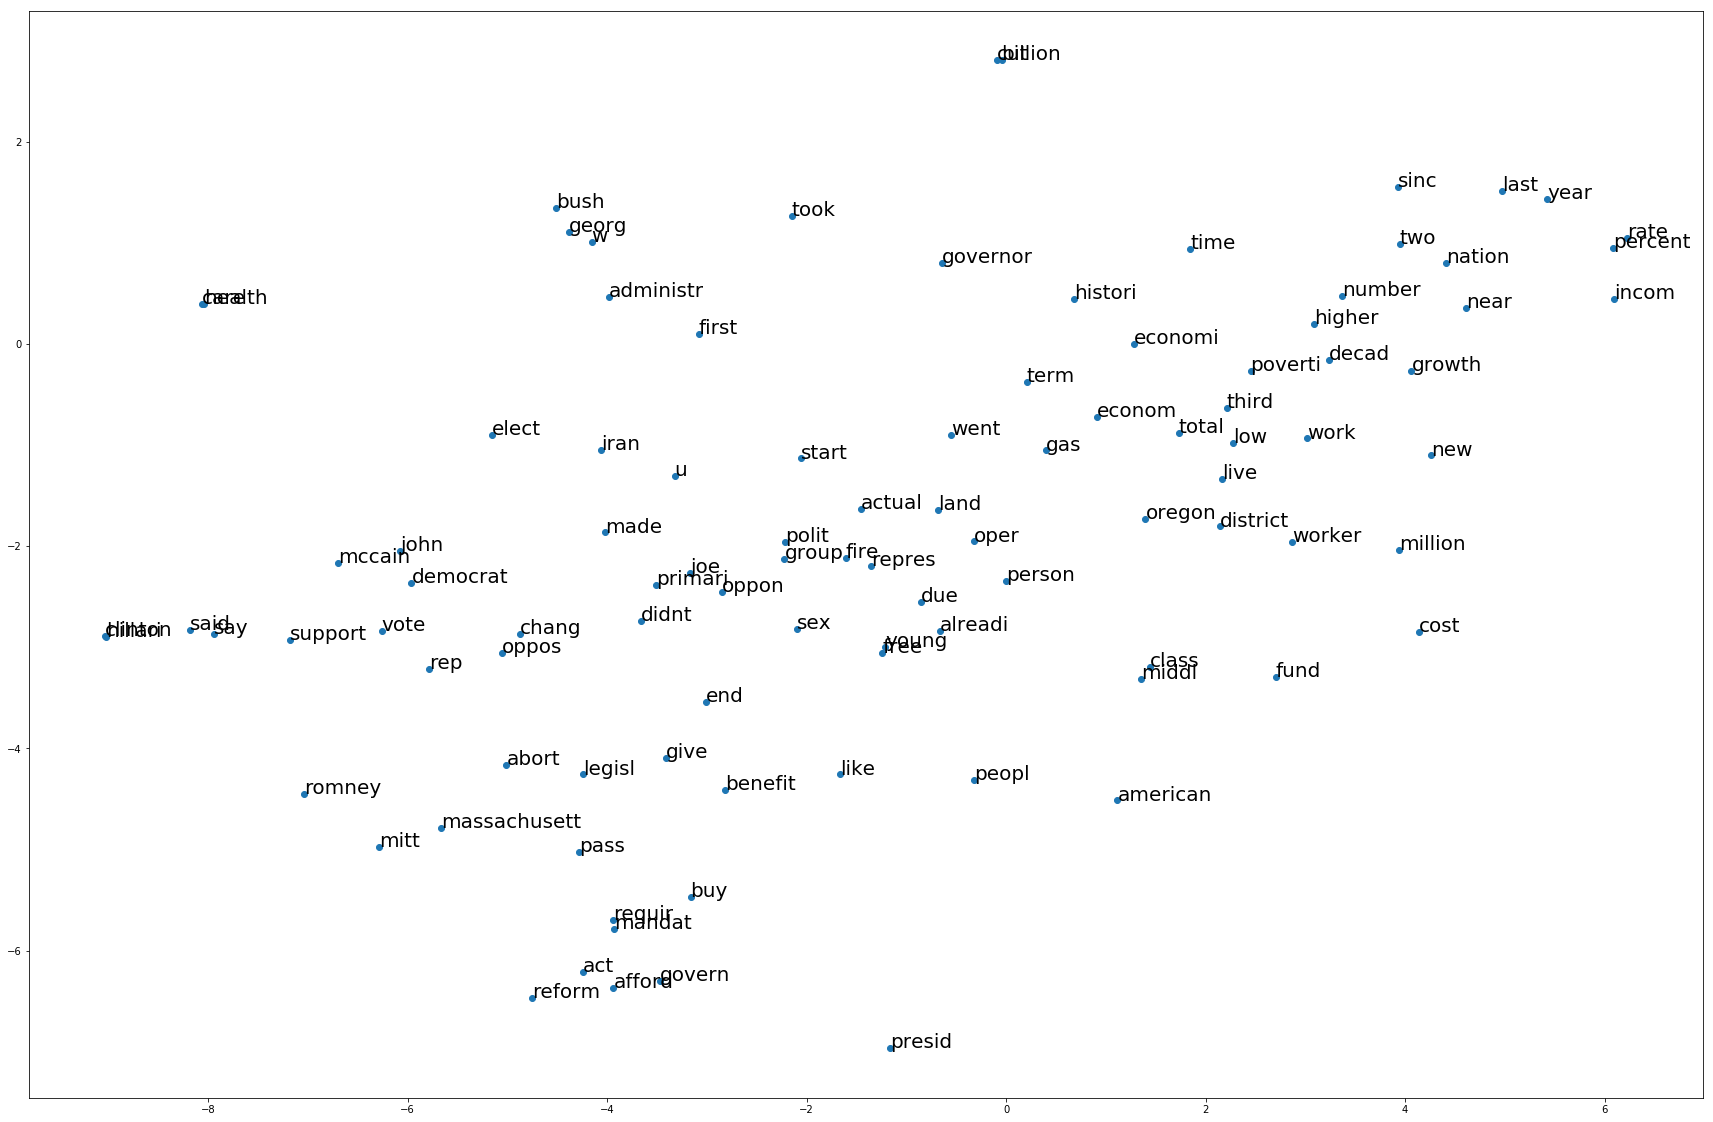

In [60]:
fig = plt.figure()
fig.set_size_inches(30,20)

ax = fig.add_subplot(1,1,1)
ax.scatter(df['X'], df['Y'])

# Put the label on each point.
for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize = 20)
plt.show()

#### Inferences: 

Compared to the previous methods' (CountVectorizer, TF-IDF) WordCloud, it appears more informative and based on the above plot, we can capture the general shape of the news. 

- For instance, if you see the bottom right corner words grouping, the 'clinton' word comes with 'hillary' in many news and the words like'democrat', 'support', 'vote' comes closer as most of the news of Hillary Clinton has these words.   

### Vector Averaging 

In [61]:
'''
Illustration example:

'I' = [0.1, 0.2, ...]
'have' = [0.2, 0.3, ...]
'a car' = [0.1, 0.2, ...]
'I have a car' = [0.1 + 0.2 + 0.1, 0.2 + 0.3 + 0.2,  ...]

'''

def makeFeatureVec(news, train_w2v, num_features):
    
    featureVec = np.zeros((num_features,), dtype = "float32")
    
    # Unique word set
    word_index = set(train_w2v.wv.index2word)
    
    # For division we need to count the number of words
    nword = 0
    
    # Iterate words in a review and if the word is in the unique wordset, add the vector values for each word.
    for word in news:
        if word in word_index:
            nword += 1
            featureVec = np.add(featureVec, train_w2v[word])
    
    # Divide the sum of vector values by total number of word in a review.
    featureVec = np.divide(featureVec, nword)        
    
    return featureVec

In [62]:
'''
return matrix:

            'V1'    'V2'    'V3'     'V4'
news 1    0.1      0.2     0.1     0.5
news 2    0.5      0.4     0.05    0.05

'''

def getAvgFeatureVec(clean_news, train_w2v, num_features):
    
    # Keep track of the sequence of each news, create the number "th" variable.
    news_th = 0
    
    # Row: number of total news, Column: number of vector spaces (num_features = 250 we set this in Word2Vec step).
    newsFeatureVecs = np.zeros((len(clean_news), num_features), dtype = "float32")
    
    # Iterate over each news and add the result of makeFeatureVec.
    for news in clean_news:
        newsFeatureVecs[int(news_th)] = makeFeatureVec(news, train_w2v, num_features)
        
        # Once the vector values are added, increase the one for the news_th variable.
        news_th += 1
    
    return newsFeatureVecs


In [63]:
# Apply "getAvgFeatureVec" function.
trainDataAvg = getAvgFeatureVec(train_news['clean'], train_w2v, num_features)
testDataAvg = getAvgFeatureVec(test_news['clean'],train_w2v, num_features)
print("Train Dimension (avg):",trainDataAvg.shape,",", "Test Dimension (avg):", testDataAvg.shape)

Train Dimension (avg): (10240, 400) , Test Dimension (avg): (1267, 400)


In [64]:
print(trainDataAvg[0:]) #for the first news in training data
print("\n\n", trainDataAvg[~np.isnan(trainDataAvg)][0:])
# print(trainDataAvg[: , ~np.isnan(trainDataAvg).any(axis=0)][0:])

[[-0.06330378 -0.02406431 -0.0460523  ...  0.05186155  0.0246019
  -0.02972706]
 [-0.06590413 -0.02463486 -0.04726251 ...  0.05178243  0.02256602
  -0.03155902]
 [-0.06330378 -0.02406431 -0.0460523  ...  0.05186155  0.0246019
  -0.02972706]
 ...
 [-0.06525405 -0.02449222 -0.04695996 ...  0.05180221  0.02307499
  -0.03110103]
 [-0.06525405 -0.02449222 -0.04695996 ...  0.05180221  0.02307499
  -0.03110103]
 [-0.06441821 -0.02430883 -0.04657096 ...  0.05182764  0.02372938
  -0.03051219]]


 [-0.06330378 -0.02406431 -0.0460523  ...  0.05182764  0.02372938
 -0.03051219]


#### Inferences from Word2Vec: 
    
The Word2Vec provides vectorization for each word. Which causes dimentional issues with the 'senti_word_vector'  column of each article.

**Solution: ** Try Doc2Vec which will provide a vector for the entire document instead of each word.

### Doc2Vec

> Doc2Vec helps to form a fixed size vector for a full document. We can feed this document vector into a machine learning classification algorithm (an SVM or other) or you could calculate the cosine distance between two different document to determine how semantically similar they are. 

**doc2vec model** — Distributed Bag of Words (DBOW). In the word2vec architecture, the two algorithm names are “continuous bag of words” (CBOW) and “skip-gram” (SG); in the doc2vec architecture, the corresponding algorithms are “distributed memory” (DM) and “distributed bag of words” (DBOW).

**Distributed Bag of Words (DBOW)**
DBOW is the doc2vec model analogous to Skip-gram model in word2vec. The paragraph vectors are obtained by training a neural network on the task of predicting a probability distribution of words in a paragraph given a randomly-sampled word from the paragraph.

I will use the following parameters:

- If dm=0, distributed bag of words (PV-DBOW) is used; if dm=1,‘distributed memory’ (PV-DM) is used.
- 300- dimensional feature vectors.
- min_count=2, ignores all words with total frequency lower than this.
- negative=5 , specifies how many “noise words” should be drawn.
- hs=0 , and negative is non-zero, negative sampling will be used.
- sample=0 , the threshold for configuring which higher-frequency words are randomly down sampled.
- workers=cores , use these many worker threads to train the model (=faster training with multicore machines).

> dm defines the training algorithm. If dm=1 means ‘distributed memory’ (PV-DM) and dm =0 means ‘distributed bag of words’ (PV-DBOW). Distributed Memory model preserves the word order in a document whereas Distributed Bag of words just uses the bag of words approach, which doesn’t preserve any word order

In [120]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
cores = multiprocessing.cpu_count()
from nltk.tokenize import word_tokenize
# from tqdm import tqdm
# tqdm.pandas(desc="progress-bar")

In [121]:
train_news.shape

(10240, 20)

In [122]:
train_news.index = range(10240)
train_news['clean'].apply(lambda x: len(x.split(' '))).sum()

109177

#### Tagged documents

In [123]:
def tag_docs(docs, col):
    tagged = docs.apply(lambda r: TaggedDocument(words=r[col].split(" "), tags=[r['senti_polarity']]), axis=1)
    return tagged

In [124]:
train_tagged = train_news.apply(lambda r: TaggedDocument(words=r['clean'].split(" "), tags=[r['senti_polarity']]), axis=1)

In [125]:
sents = train_tagged.values
print("Train Tags: ", sents[20])

Train Tags:  TaggedDocument(['women', 'men', 'make', 'less', 'adjust', 'inflat', 'john', 'kitzhab', 'first', 'elect', 'governor'], [1])


In [126]:
warnings.filterwarnings("ignore",category=UserWarning)
model = Doc2Vec(sents, size=1, window=100, iter=20, dm=1)

print(model.docvecs.count)
# model.build_vocab([x for x in tqdm(train_tagged)])

2


In [127]:
def train_doc2vec_model(tagged_docs, window, size):
    sents = tagged_docs.values
    doc2vec_model = Doc2Vec(sents, size=size, window=window, iter=20, dm=1)
    return doc2vec_model

#### Building the final vector feature for the classifier:

In [128]:
def vec_for_learning(doc2vec_model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], doc2vec_model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

### Classifier Modeling using Doc2Vec

In [129]:
# Training and Test data with Doc2Vec 
# The vector has two sentiments values - positive and negative 
train_tagged = tag_docs(train_news, 'clean')
test_tagged = tag_docs(test_news, 'clean')
model = train_doc2vec_model(train_tagged, 100, 1)

y_train, X_train = vec_for_learning(model, train_tagged)
y_test, X_test = vec_for_learning(model, test_tagged)

In [130]:
print("\n X train dim: ", len(X_train))
print("\n y train dim: ", len(y_train))
print("\n X test dim: ", len(X_test))
print("\n y test dim:", len(y_test))


 X train dim:  10240

 y train dim:  10240

 X test dim:  1267

 y test dim: 1267


#### Building Classifier using Logistic regression

In [137]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy : ", f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy :  0.9110442629995702


array([[   0,  207],
       [   0, 1060]])

##### Building Classifier using Linear SVM Classifier

In [133]:
svm_lin = svm.LinearSVC()
svm_lin.fit(X_train, y_train)
y_pred = svm_lin.predict(X_test)
print("Accuracy : ", f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy :  0.9110442629995702


array([[   0,  207],
       [   0, 1060]])

##### Building Classifier using RandomForestClassifier

In [135]:
#random forest
r_forest = RandomForestClassifier(n_estimators=200,n_jobs=3)
r_forest.fit(X_train, y_train)
y_pred = r_forest.predict(X_test)
print("Accuracy : ", f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy :  0.844235294117647


array([[ 39, 168],
       [163, 897]])

##### Building Classifier using SVM Stochastic Gradient Descent on hinge loss

In [136]:
sgb = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=10)
sgb.fit(X_train, y_train)
y_pred = sgb.predict(X_test)
print("Accuracy : ", f1_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy :  0.9110442629995702


array([[   0,  207],
       [   0, 1060]])

### Result:
#### Most of the models like Linear SVM,  LogisticRegression provides the maximum score as 91%.